<a href="https://colab.research.google.com/github/c-mmonteiro/t2-aprendizado/blob/main/Trabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho 2 de Aprendizado de Máquina

Autor: Carlos A. M. Monteiro

## 1 Carregamento dos dados e EDA inicial

1. Baixe e carregue os dados a partir do Kaggle
link: https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset?datasetId=2066095&sortBy=voteCount

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/twitter-tweets-sentiment-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.23M/1.23M [00:00<00:00, 58.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/twitter-tweets-sentiment-dataset/versions/1


In [3]:
import pandas as pd
dados = pd.read_csv(path + "/Tweets.csv")
dados.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


2. Crie a variável alvo conforme a Tabela 1 e salve no dataset (por exemplo como target)

In [4]:
dados['target'] = dados['sentiment'].apply(lambda x: 1 if x == 'negative' else 0)
dados

,textID,text,selected_text,sentiment,target
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,1
2,088c60f138,my boss is bullying me...,bullying me,negative,1
3,9642c003ef,what interview! leave me alone,leave me alone,negative,1
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,1
...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,1
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,1
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,0
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,0


3. Observe se existem dados faltantes ou duplicados

In [5]:
print(f'Dados Faltantes:\n{dados.isnull().sum()}')
print(f'Linhas duplicadas:', dados.duplicated().sum())

Dados Faltantes:
textID           0
text             1
selected_text    1
sentiment        0
target           0
dtype: int64
Linhas duplicadas: 0


4. Plote um histograma do número dos caracteres dos reviews

Text(0, 0.5, 'Frequência')

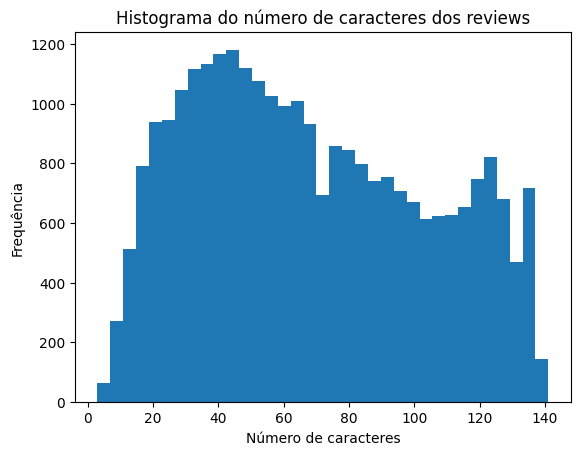

In [6]:
import matplotlib.pyplot as plt
import numpy as np

dados['text_str'] = dados['text'].astype(str)
dados['text_len'] = dados['text_str'].apply(len)

# Usando a regra de Freedman-Diaconis para determinar o número de bins
bins = int((np.max(dados['text_len']) - np.min(dados['text_len'])) / (2 * (np.percentile(dados['text_len'], 75) - np.percentile(dados['text_len'], 25)) * len(dados['text_len'])**(-1/3)))

plt.hist(dados['text_len'], bins=bins)
plt.title('Histograma do número de caracteres dos reviews')
plt.xlabel('Número de caracteres')
plt.ylabel('Frequência')

5. Plote um histograma do número de palavras dos reviews

Text(0, 0.5, 'Frequência')

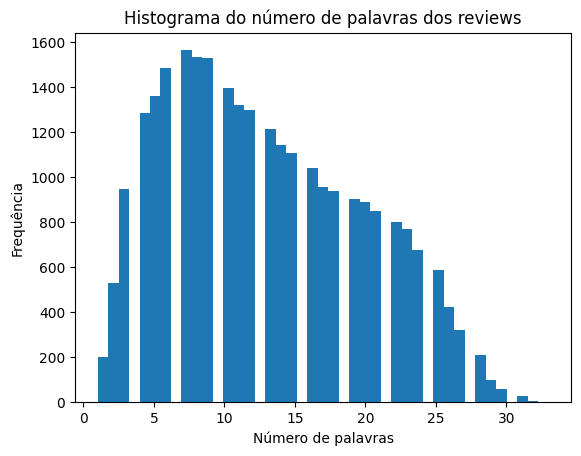

In [7]:
dados['word_count'] = dados['text_str'].apply(lambda x: len(x.split()))

bins = int((np.max(dados['word_count']) - np.min(dados['word_count'])) / (2 * (np.percentile(dados['word_count'], 75) - np.percentile(dados['word_count'], 25)) * len(dados['word_count'])**(-1/3)))

plt.hist(dados['word_count'], bins=bins)
plt.title('Histograma do número de palavras dos reviews')
plt.xlabel('Número de palavras')
plt.ylabel('Frequência')

6. Mostre os 5 maiores e menores comentários e o sentimento relacionado

In [8]:
comentarios_ordenados = dados[['text', 'text_len', 'sentiment']].sort_values('text_len', ascending=False)

print('5 maiores comentários:')
print(comentarios_ordenados.head(5))

print('\n5 menores comentários:')
print(comentarios_ordenados.tail(5))

5 maiores comentários:
                                                    text  text_len sentiment
3138   Is so freaking bored on the bus. Hate being po...       141  negative
27318  just saw an advert for ATTICS TO EDEN on tv  o...       141   neutral
13896  Feeling madly sorry for myself... - ï¿½Iï¿½M S...       140  negative
12456  Have ordered the cuuutest invitations for my n...       139   neutral
16851  4 novos followers http://migre.me/SfN Sorry, t...       139  negative

5 menores comentários:
      text  text_len sentiment
25699   ME         3   neutral
26005    ?         3   neutral
14339   ow         3   neutral
641     no         3   neutral
11524   aw         3   neutral


7. Mostre um WordCloud com todo o texto dos reviews (utilize a função WordCloud da biblioteca wordcloud)

Text(0.5, 1.0, 'WordCloud de todas as palavras dos reviews')

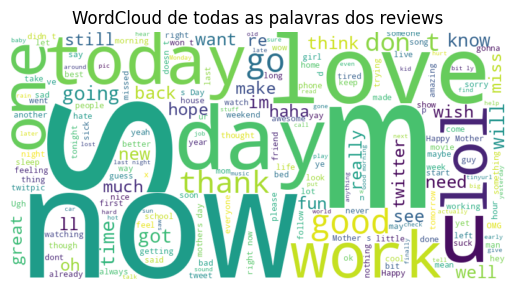

In [8]:
from wordcloud import WordCloud

texto_todos = ' '.join(dados['text_str'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_todos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de todas as palavras dos reviews')

7.a) Repita somente para os comentários negativos

Text(0.5, 1.0, 'WordCloud de todas as palavras dos reviews negativos')

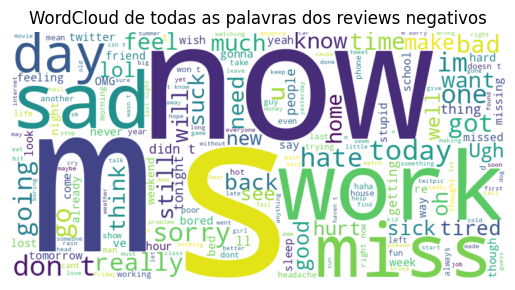

In [9]:
texto_todos = ' '.join(dados[dados['sentiment'] == 'negative']['text_str'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_todos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de todas as palavras dos reviews negativos')

7.b) Repita somente para os comentários neutros

Text(0.5, 1.0, 'WordCloud de todas as palavras dos reviews neutros')

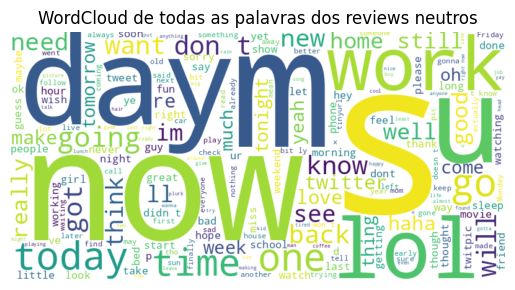

In [10]:
texto_todos = ' '.join(dados[dados['sentiment'] == 'neutral']['text_str'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_todos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de todas as palavras dos reviews neutros')

7.c) Repita somente para os comentários positivos

Text(0.5, 1.0, 'WordCloud de todas as palavras dos reviews positivos')

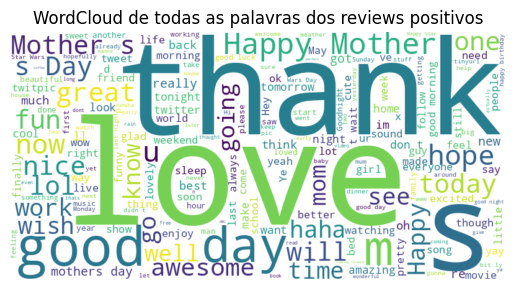

In [11]:
texto_todos = ' '.join(dados[dados['sentiment'] == 'positive']['text_str'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_todos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de todas as palavras dos reviews positivos')

8. Mostre a distribuição da variável alvo através de um gráfico de barras

Text(0, 0.5, 'Frequência')

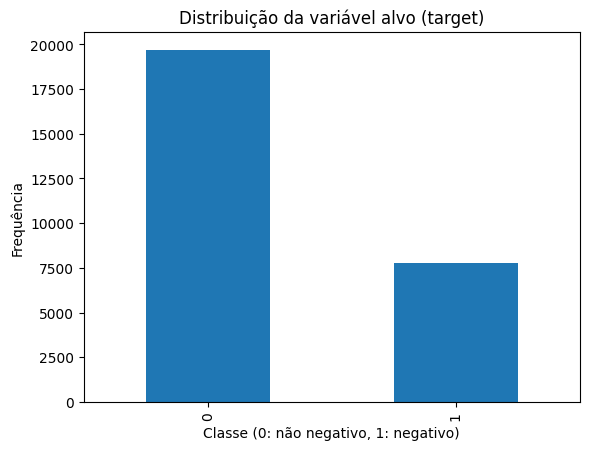

In [12]:

dados['target'].value_counts().plot(kind='bar')
plt.title('Distribuição da variável alvo (target)')
plt.xlabel('Classe (0: não negativo, 1: negativo)')
plt.ylabel('Frequência')

8.a) Repita mostrando a distribuição dos sentimentos originais (negativo, positivo e neutro)

Text(0, 0.5, 'Frequência')

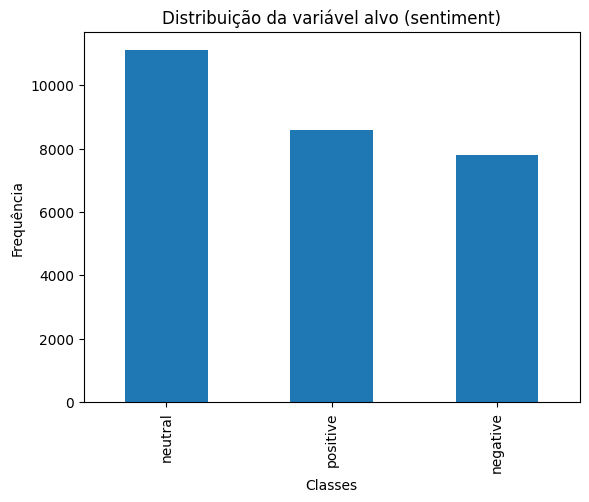

In [13]:
dados['sentiment'].value_counts().plot(kind='bar')
plt.title('Distribuição da variável alvo (sentiment)')
plt.xlabel('Classes')
plt.ylabel('Frequência')

Visualizar os dados em forma de vetore


In [20]:
from sklearn.feature_extraction.text import CountVectorizer

texto = dados['text'].astype(str)

vectorizer = CountVectorizer()
vectorizer.fit(texto)

texto_BoW = pd.DataFrame.sparse.from_spmatrix(
  vectorizer.transform(texto),
  columns=vectorizer.get_feature_names_out())
texto_BoW

,00,000,000th,00am,00pm,01,02,024,02mxjj,03,...,½tearï,½timo,½ureo,½ve,½why,½whyyy,½y,½you,½z,½ï
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Limpeza e separação dos dados

1. Remova as colunas extra do dataset, deixando somente as colunas text e target

In [9]:
dados = dados.drop(columns=['textID', 'selected_text', 'sentiment',
        'text_str', 'text_len', 'word_count'])

2. (Se necessário) Trate os dados faltantes ou duplicados

Como indicado acima, temos um dado faltante na coluna text e nenhum duplicado.

In [10]:
dados = dados.dropna().reset_index(drop=True)

3. Separe 20% do conjunto para teste utilizando a divisão estratificada com base na coluna target

In [11]:
from sklearn.model_selection import train_test_split


X_train_val, X_test, y_train_val, y_test = train_test_split(dados['text'], dados['target'], test_size=0.2)

4. Separar o conjunto de Validação


In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2)

## 3. Seleção de hiperparâmetros

### 3.1 Otimização com validação por hold-out

**Opção**: Pela otimização pelo uso de validação Hold-out uma vez que, no meu entendimento, o conjunto de dados tem tamanho suficiente isso.



**(Pipeline de pré-processamento)**
1. Nesta etapa, defina a pipeline de pré-processamento como sendo somente o CountVectorizer com seus parâmetros padrão

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = make_pipeline(CountVectorizer(), LogisticRegression())

**(Seleção de hiperparâmetros)**

2. Regressão Logística


a) Treine um modelo de regressão logística com os parâmetros padrão


In [24]:
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

print('Acurácia no conjunto de treino:', accuracy_score(y_train, y_pred_train))
print('Acurácia no conjunto de validação:', accuracy_score(y_val, y_pred_val))



Acurácia no conjunto de treino: 0.9264229260249047
Acurácia no conjunto de validação: 0.8271548783261314


b) Realize a otimização de hiperparâmetros usando GridSearch


In [67]:
def grid_search_holdout_pipeline(param_grid, X_train, y_train, X_val, y_val):
  val_index = [-1]*len(X_train) + [0]*len(X_val)

  model = make_pipeline(CountVectorizer(),
                        GridSearchCV(LogisticRegression(max_iter=1000), param_grid,
                                    refit=False, cv=PredefinedSplit(val_index)))

  model.fit(np.r_[X_train, X_val], np.r_[y_train, y_val])

  return model


In [100]:
from sklearn.model_selection import GridSearchCV, PredefinedSplit


param_grid = {'C':     np.arange(0.1, 10, 0.2)}

model = grid_search_holdout_pipeline(param_grid, X_train, y_train, X_val, y_val)

print('Melhor parâmetro:', model[1].best_params_)
print('Melhor acurácia:', model[1].best_score_)

Melhor parâmetro: {'C': np.float64(0.5000000000000001)}
Melhor acurácia: 0.828064589492836


Otimização usando Optuna (extra)

In [15]:
!pip install optuna
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 11.8 MB/s eta 0:00:00


In [97]:
def objective(trial):

  c = trial.suggest_float("c", 0.1, 10.0)
  #tol = trial.suggest_float('tol', 0.00001, 10.0)

  model = make_pipeline(CountVectorizer(), LogisticRegression(C=c, max_iter=1000))
  model.fit(X_train, y_train)

  y_pred = model.predict(X_val)

  return accuracy_score(y_val, y_pred)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print('###################################')
print('Melhor parâmetro:', study.best_params)
print('Melhor acurácia:', study.best_value)

[I 2025-09-25 23:44:58,630] A new study created in memory with name: no-name-464fcf17-6fcb-4f09-9d33-e7ef288f5de3
[I 2025-09-25 23:45:03,636] Trial 0 finished with value: 0.8187400500341142 and parameters: {'c': 9.874091071811472}. Best is trial 0 with value: 0.8187400500341142.
[I 2025-09-25 23:45:06,128] Trial 1 finished with value: 0.8189674778257903 and parameters: {'c': 9.395848139939421}. Best is trial 1 with value: 0.8189674778257903.
[I 2025-09-25 23:45:08,103] Trial 2 finished with value: 0.8246531726176939 and parameters: {'c': 1.6248738538229097}. Best is trial 2 with value: 0.8246531726176939.
[I 2025-09-25 23:45:11,133] Trial 3 finished with value: 0.8191949056174664 and parameters: {'c': 9.99806240956468}. Best is trial 2 with value: 0.8246531726176939.
[I 2025-09-25 23:45:13,585] Trial 4 finished with value: 0.818512622242438 and parameters: {'c': 7.447878841918528}. Best is trial 2 with value: 0.8246531726176939.
[I 2025-09-25 23:45:17,880] Trial 5 finished with value: 

###################################
Melhor parâmetro: {'c': 0.7181518632931494}
Melhor acurácia: 0.8289743006595406


3. SVM com kernel RBF

a) Treine com os parâmetros padrão

In [19]:
from sklearn.svm import SVC


model = make_pipeline(CountVectorizer(), SVC(kernel='rbf'))
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

print('Acurácia no conjunto de treino:', accuracy_score(y_train, y_pred_train))
print('Acurácia no conjunto de validação:', accuracy_score(y_val, y_pred_val))

Acurácia no conjunto de treino: 0.9294365156081197
Acurácia no conjunto de validação: 0.797816693199909


b) Realize a otimização de hiperparâmetros com Optuna (SVM é muito pesado)

In [ ]:
def objective(trial):

    c = trial.suggest_float("c", 0.001, 10.0)
    gamma = trial.suggest_float("gamma", 0.0001, 10.0)

    model = make_pipeline(CountVectorizer(), SVC(C = c, gamma=gamma, kernel='rbf'))
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    return accuracy_score(y_val, y_pred)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200)

print('###################################')
print('Melhor parâmetro:', study.best_params)
print('Melhor acurácia:', study.best_value)

[I 2025-09-26 15:06:41,398] A new study created in memory with name: no-name-2979bae5-c9e7-45f0-a13b-8492fddd53ef
[I 2025-09-26 15:11:12,860] Trial 0 finished with value: 0.7334546281555606 and parameters: {'c': 1.4846669779680433, 'gamma': 0.39930234087484073}. Best is trial 0 with value: 0.7334546281555606.
[I 2025-09-26 15:16:49,658] Trial 1 finished with value: 0.7088924266545372 and parameters: {'c': 2.3945650231738123, 'gamma': 7.703736793786375}. Best is trial 0 with value: 0.7334546281555606.
[I 2025-09-26 15:20:51,853] Trial 2 finished with value: 0.7079827154878326 and parameters: {'c': 0.32488151848544444, 'gamma': 4.53232991834734}. Best is trial 0 with value: 0.7334546281555606.
[I 2025-09-26 15:26:28,546] Trial 3 finished with value: 0.7088924266545372 and parameters: {'c': 6.8377772864805575, 'gamma': 3.3480595221558125}. Best is trial 0 with value: 0.7334546281555606.
[I 2025-09-26 15:29:56,125] Trial 4 finished with value: 0.7075278599044803 and parameters: {'c': 0.122

4. Árvore de Decisão

a) Treine com os parâmetros padrão

In [91]:
from sklearn.tree import DecisionTreeClassifier

model = make_pipeline(CountVectorizer(), DecisionTreeClassifier())
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

print('Acurácia no conjunto de treino:', accuracy_score(y_train, y_pred_train))
print('Acurácia no conjunto de validação:', accuracy_score(y_val, y_pred_val))

Acurácia no conjunto de treino: 0.9997725592767385
Acurácia no conjunto de validação: 0.7905390038662724


b) Realize a otimização de hiperparâmetros

In [101]:
def grid_search_holdout_pipeline(param_grid, X_train, y_train, X_val, y_val):
  val_index = [-1]*len(X_train) + [0]*len(X_val)

  model = make_pipeline(CountVectorizer(),
                        GridSearchCV(DecisionTreeClassifier(), param_grid,
                                    refit=False, cv=PredefinedSplit(val_index)))

  model.fit(np.r_[X_train, X_val], np.r_[y_train, y_val])

  return model

In [113]:
param_grid = {'max_depth':          np.arange(5, 100, 15),
              'min_samples_split':  np.arange(2, 10, 2),
              'min_samples_leaf':   np.arange(1, 10, 3)}

model = grid_search_holdout_pipeline(param_grid, X_train, y_train, X_val, y_val)

print('Melhor parâmetro:', model[1].best_params_)
print('Melhor acurácia:', model[1].best_score_)

Melhor parâmetro: {'max_depth': np.int64(35), 'min_samples_leaf': np.int64(1), 'min_samples_split': np.int64(8)}
Melhor acurácia: 0.7998635433249943


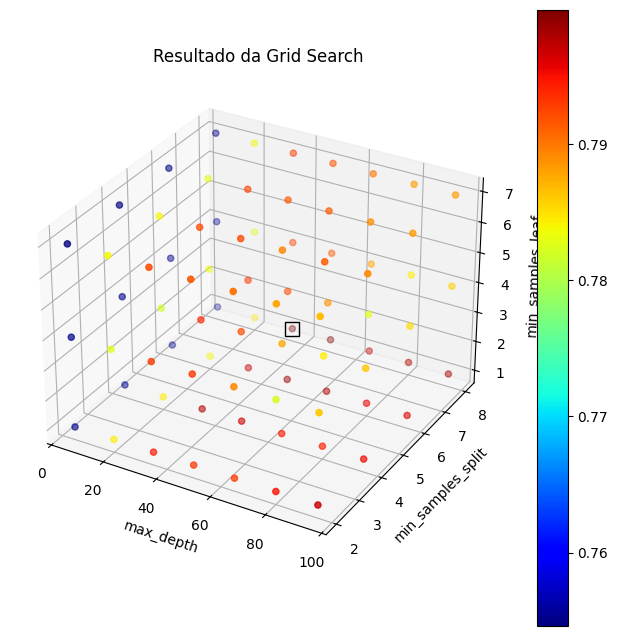

In [114]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')


scatter = ax.scatter(model[1].cv_results_['param_max_depth'],
                     model[1].cv_results_['param_min_samples_split'],
                     model[1].cv_results_['param_min_samples_leaf'],
                     c=model[1].cv_results_['mean_test_score'], cmap='jet')
ax.plot(model[1].best_params_['max_depth'],
        model[1].best_params_['min_samples_split'],
        model[1].best_params_['min_samples_leaf'],
        'ks', mfc='none', markersize=10)

plt.title('Resultado da Grid Search')
plt.xlabel('max_depth')
plt.ylabel('min_samples_split')
ax.set_zlabel('min_samples_leaf')
fig.colorbar(scatter)
plt.show()

Rodando novamente o Grid Search para verificar se o ponto ótimo não está além dos limites testados.

In [115]:
param_grid = {'max_depth':          np.arange(20, 80, 5),
              'min_samples_split':  np.arange(6, 15, 1),
              'min_samples_leaf':   np.arange(1, 3, 1)}

model = grid_search_holdout_pipeline(param_grid, X_train, y_train, X_val, y_val)

print('Melhor parâmetro:', model[1].best_params_)
print('Melhor acurácia:', model[1].best_score_)

Melhor parâmetro: {'max_depth': np.int64(50), 'min_samples_leaf': np.int64(1), 'min_samples_split': np.int64(7)}
Melhor acurácia: 0.802592676825108


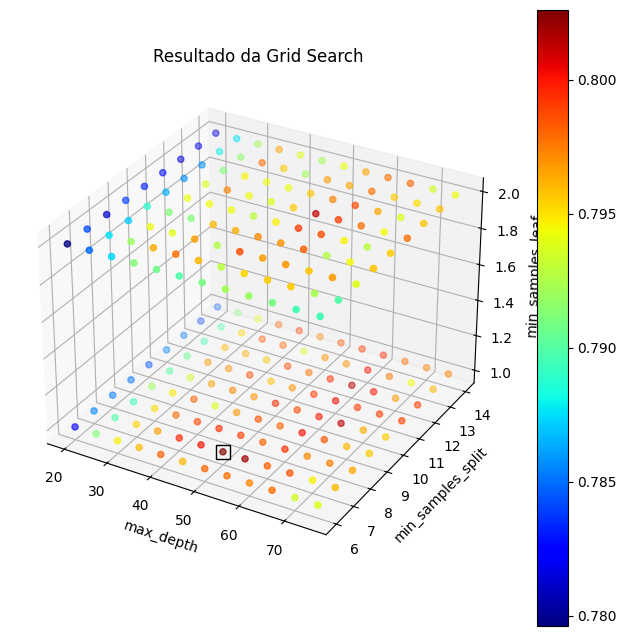

In [116]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')


scatter = ax.scatter(model[1].cv_results_['param_max_depth'],
                     model[1].cv_results_['param_min_samples_split'],
                     model[1].cv_results_['param_min_samples_leaf'],
                     c=model[1].cv_results_['mean_test_score'], cmap='jet')
ax.plot(model[1].best_params_['max_depth'],
        model[1].best_params_['min_samples_split'],
        model[1].best_params_['min_samples_leaf'],
        'ks', mfc='none', markersize=10)

plt.title('Resultado da Grid Search')
plt.xlabel('max_depth')
plt.ylabel('min_samples_split')
ax.set_zlabel('min_samples_leaf')
fig.colorbar(scatter)
plt.show()

In [120]:
def objective(trial):

    max_depth = trial.suggest_int("max_depth", 5, 100)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 15)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    model = make_pipeline(CountVectorizer(), DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf))
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    return accuracy_score(y_val, y_pred)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200)

print('###################################')
print('Melhor parâmetro:', study.best_params)
print('Melhor acurácia:', study.best_value)


[I 2025-09-26 02:01:52,400] A new study created in memory with name: no-name-075cd9d1-2067-43c2-9a7b-488a479faa6a
[I 2025-09-26 02:01:55,190] Trial 0 finished with value: 0.7855355924493973 and parameters: {'max_depth': 80, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.7855355924493973.
[I 2025-09-26 02:01:55,841] Trial 1 finished with value: 0.7762110529906755 and parameters: {'max_depth': 12, 'min_samples_split': 13, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.7855355924493973.
[I 2025-09-26 02:01:58,068] Trial 2 finished with value: 0.7900841482829202 and parameters: {'max_depth': 71, 'min_samples_split': 14, 'min_samples_leaf': 7}. Best is trial 2 with value: 0.7900841482829202.
[I 2025-09-26 02:01:59,395] Trial 3 finished with value: 0.7928132817830339 and parameters: {'max_depth': 34, 'min_samples_split': 2, 'min_samples_leaf': 8}. Best is trial 3 with value: 0.7928132817830339.
[I 2025-09-26 02:01:59,917] Trial 4 finished with value: 0.7

###################################
Melhor parâmetro: {'max_depth': 52, 'min_samples_split': 14, 'min_samples_leaf': 3}
Melhor acurácia: 0.8016829656584035


5. Floresta Aleatória

a) Treine com os parâmetros padrão

In [94]:
from sklearn.ensemble import RandomForestClassifier

model = make_pipeline(CountVectorizer(), RandomForestClassifier())
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

print('Acurácia no conjunto de treino:', accuracy_score(y_train, y_pred_train))
print('Acurácia no conjunto de validação:', accuracy_score(y_val, y_pred_val))

Acurácia no conjunto de treino: 0.9997725592767385
Acurácia no conjunto de validação: 0.8178303388674096


b) Realize a otimização de hiperparâmetros

In [121]:
def objective(trial):

    n_estimators = trial.suggest_int("n_estimators", 10, 1000)
    max_depth = trial.suggest_int("max_depth", 1, 100)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    model = make_pipeline(CountVectorizer(), RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf))
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    return accuracy_score(y_val, y_pred)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=150)

print('###################################')
print('Melhor parâmetro:', study.best_params)
print('Melhor acurácia:', study.best_value)

[I 2025-09-26 02:11:30,106] A new study created in memory with name: no-name-4d3be4da-0445-4626-9f64-ee333f57baa0
[I 2025-09-26 02:11:32,643] Trial 0 finished with value: 0.7211735274050489 and parameters: {'n_estimators': 365, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.7211735274050489.
[I 2025-09-26 02:11:41,626] Trial 1 finished with value: 0.7252672276552194 and parameters: {'n_estimators': 637, 'max_depth': 44, 'min_samples_split': 3, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.7252672276552194.
[I 2025-09-26 02:11:52,865] Trial 2 finished with value: 0.724584944280191 and parameters: {'n_estimators': 877, 'max_depth': 40, 'min_samples_split': 13, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.7252672276552194.
[I 2025-09-26 02:11:55,912] Trial 3 finished with value: 0.7211735274050489 and parameters: {'n_estimators': 535, 'max_depth': 8, 'min_samples_split': 15, 'min_samples_leaf': 8}. Best is trial 1 with value

###################################
Melhor parâmetro: {'n_estimators': 879, 'max_depth': 100, 'min_samples_split': 6, 'min_samples_leaf': 1}
Melhor acurácia: 0.7944052763247669


6. Gradient Boosting

a) Treine com os parâmetros padrão

In [16]:
import xgboost as xgb

model = make_pipeline(CountVectorizer(), xgb.XGBClassifier())
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

print('Acurácia no conjunto de treino:', accuracy_score(y_train, y_pred_train))
print('Acurácia no conjunto de validação:', accuracy_score(y_val, y_pred_val))

Acurácia no conjunto de treino: 0.8554045601865014
Acurácia no conjunto de validação: 0.8096429383670685


b) Realize a otimização de hiperparâmetros

In [17]:
def objective(trial):

    n_estimators = trial.suggest_int("n_estimators", 10, 1000)
    max_depth = trial.suggest_int("max_depth", 1, 100)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    model = make_pipeline(CountVectorizer(), xgb.XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf))
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    return accuracy_score(y_val, y_pred)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print('###################################')
print('Melhor parâmetro:', study.best_params)
print('Melhor acurácia:', study.best_value)

[I 2025-09-26 14:57:00,856] A new study created in memory with name: no-name-df23776c-c0c4-408e-ba01-469545250d4a
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:57:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-09-26 14:57:29,101] Trial 0 finished with value: 0.8123720718671822 and parameters: {'n_estimators': 66, 'max_depth': 29, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8123720718671822.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:57:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-09-26 14:59:50,113] Trial 1 finished with value: 0.8075960882419831 and parameters: {'n_estimators': 331, 'max_depth': 51, 'min_samples_split': 2, 'min_samples_le

KeyboardInterrupt: 